In [1]:
# in Unsupervised learning there is no column to consider as result and measure the mode performance according 


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('customer bank.csv')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<AxesSubplot:xlabel='age', ylabel='Count'>

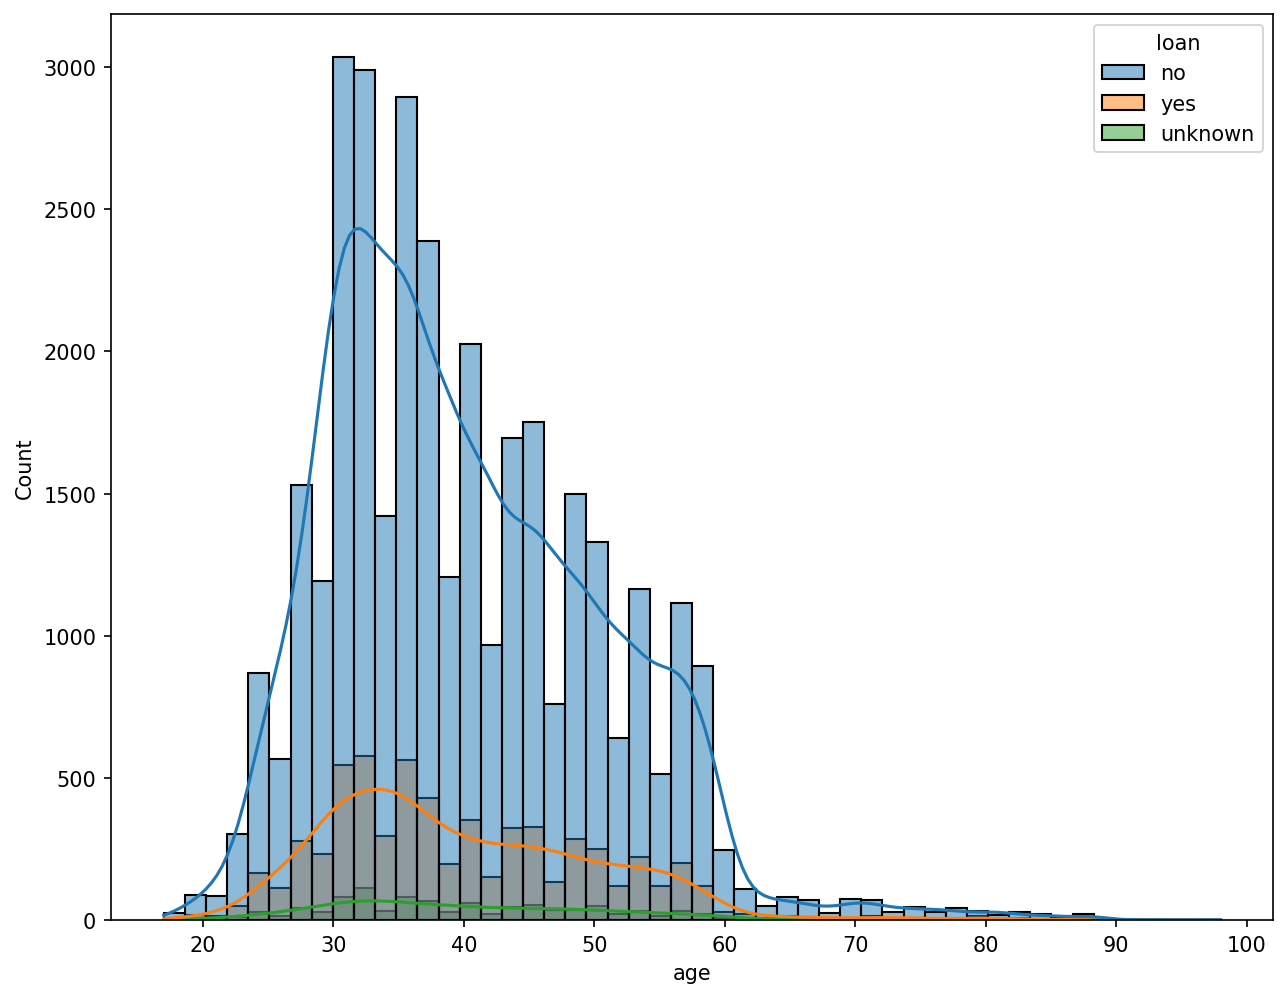

In [7]:
plt.figure(figsize=(10,8), dpi=150)
sns.histplot(data=df,x='age', hue='loan',bins=50, kde=True)

In [8]:
# majority of customers had nor took loan !! 

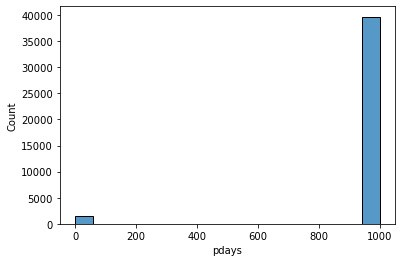

In [9]:
sns.histplot(data=df,x='pdays');

In [10]:
# most of customers didnt contact the bank from long time !!

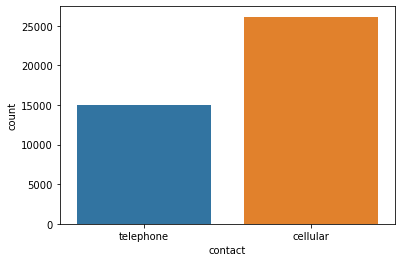

In [11]:
sns.countplot(data=df,x='contact');

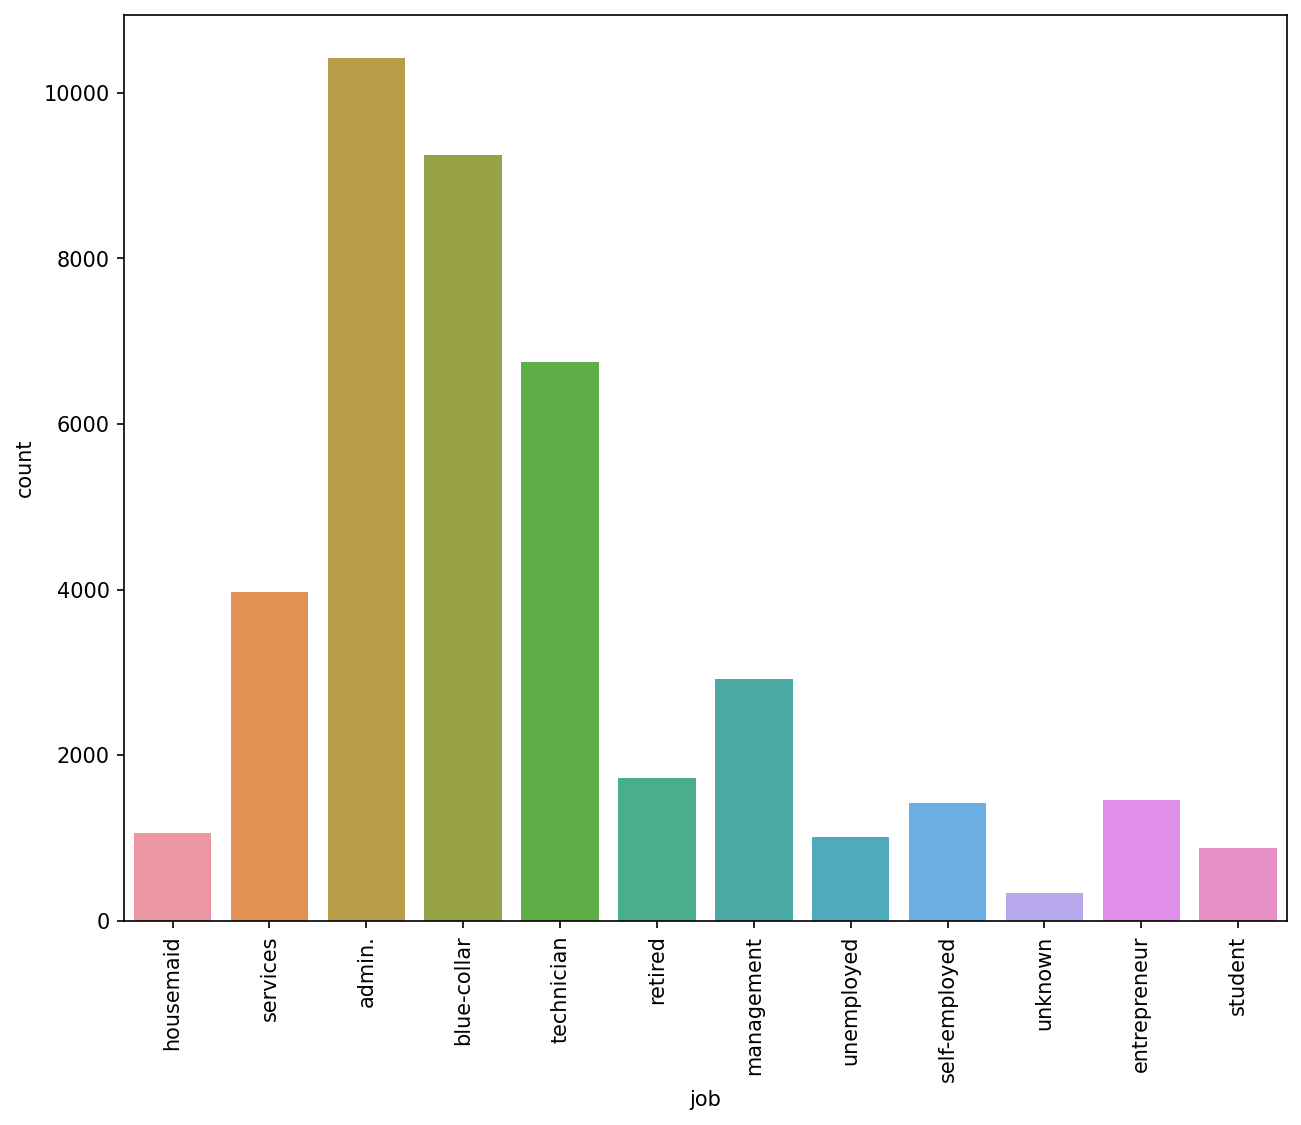

In [12]:
plt.figure(figsize=(10,8), dpi=150)
sns.countplot(data=df,x='job')
plt.xticks(rotation=90);

In [13]:
# To make the plot shows results in order : 

df['job'].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object')

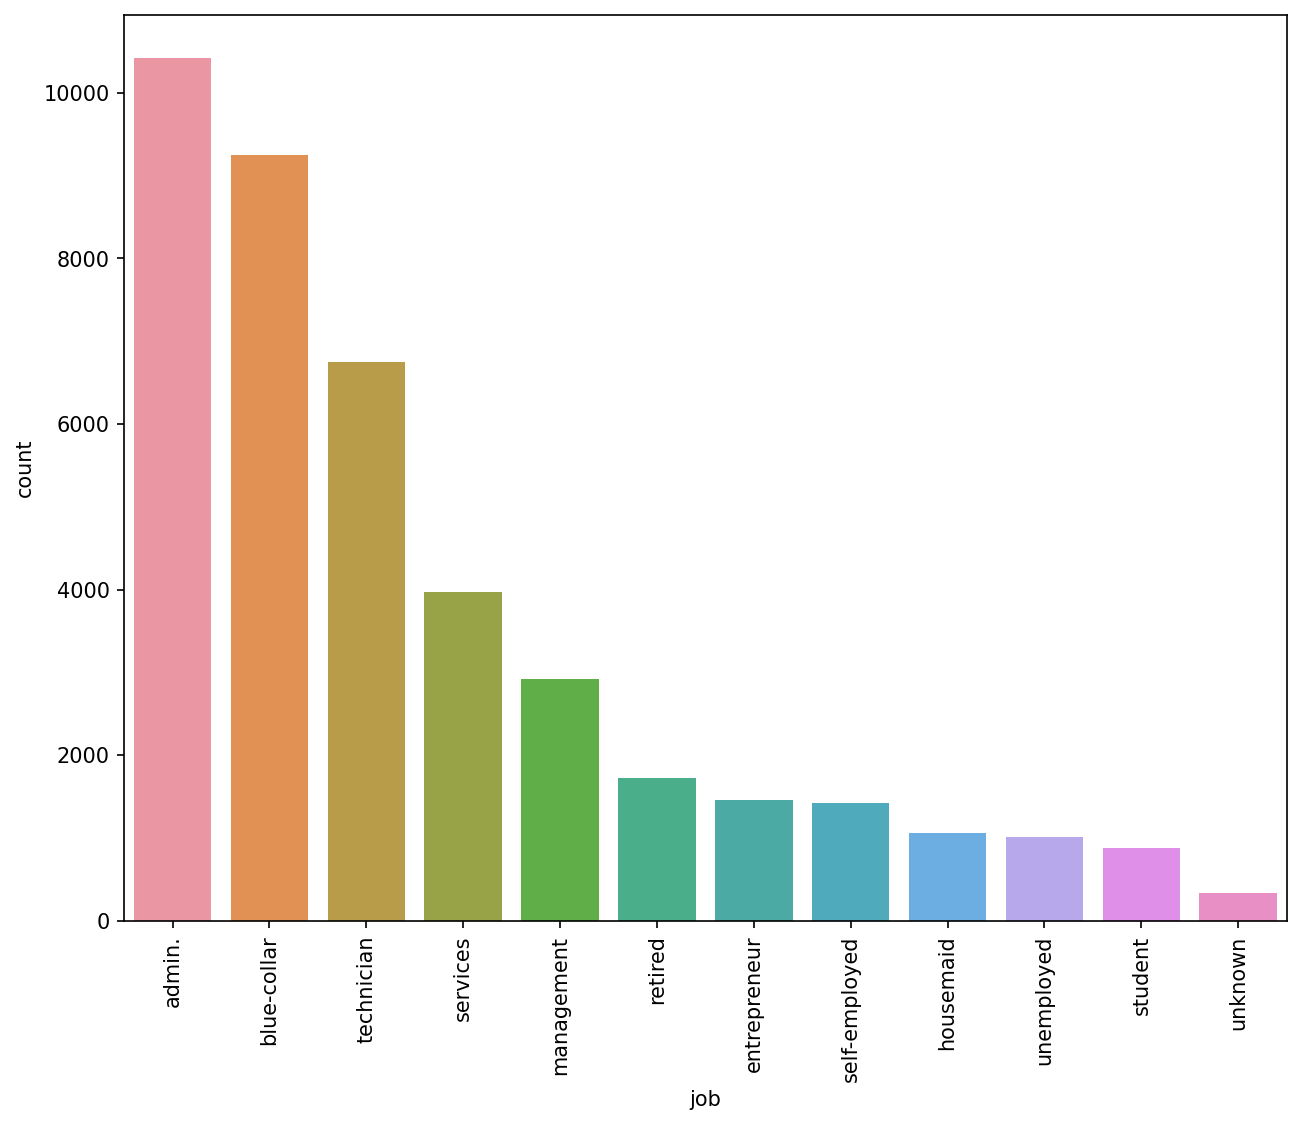

In [14]:
plt.figure(figsize=(10,8), dpi=150)
sns.countplot(data=df,x='job',order=['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'])
plt.xticks(rotation=90);

In [15]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [16]:
# this unsupervised learning -- so there is no ( y ) only there is data all consider ( X )
# always it is better to scale the data 
# all data should changed to numerical by using ( get_dummies)

In [17]:
X = pd.get_dummies(df)
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [18]:
# importing the model ( KMeans)
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
# by defualt n_clusters = 8 i.e. the numbers of areas that will spreate the data to 
cluster_labels = model.fit_predict(scaled_X )
X['cluster'] = cluster_labels
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1


In [19]:
X['cluster'].unique()

array([1, 0])

In [20]:
# only two values as ( n_clusters=2)

In [21]:
X.corr()['cluster']

age                     0.019699
duration               -0.039894
campaign                0.129129
pdays                   0.267700
previous               -0.478467
                          ...   
poutcome_nonexistent    0.544377
poutcome_success       -0.254393
subscribed_no           0.294610
subscribed_yes         -0.294610
cluster                 1.000000
Name: cluster, Length: 66, dtype: float64

In [22]:
X.corr()['cluster'].iloc[:-1]

age                     0.019699
duration               -0.039894
campaign                0.129129
pdays                   0.267700
previous               -0.478467
                          ...   
poutcome_failure       -0.464295
poutcome_nonexistent    0.544377
poutcome_success       -0.254393
subscribed_no           0.294610
subscribed_yes         -0.294610
Name: cluster, Length: 65, dtype: float64

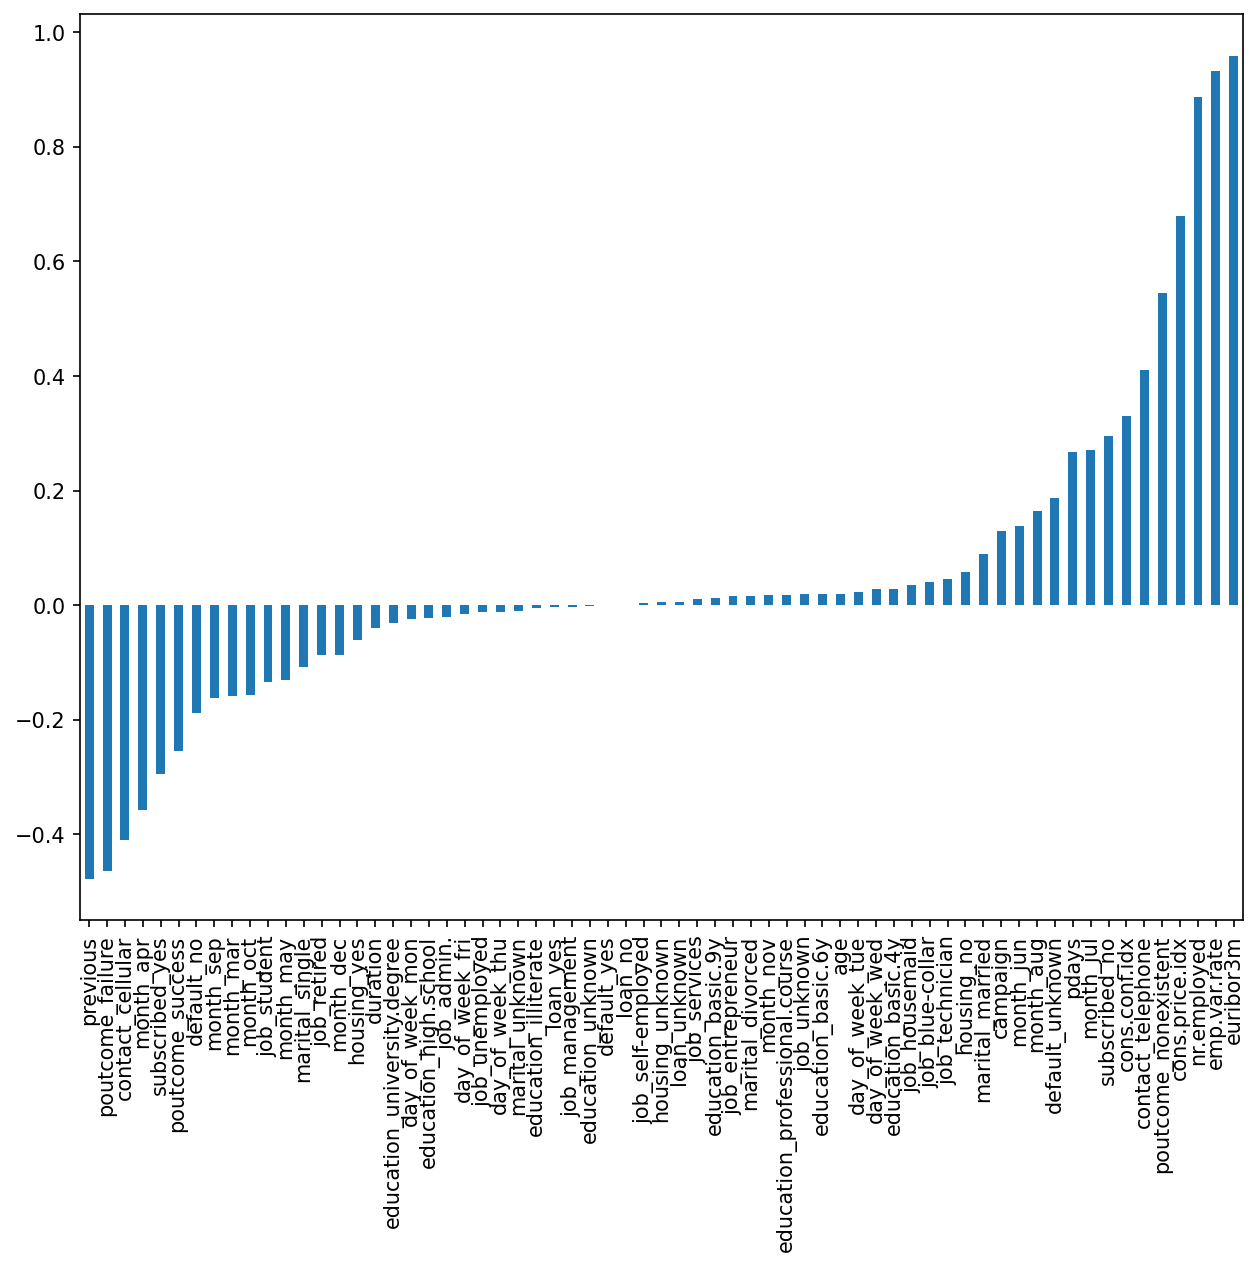

In [23]:
plt.figure(figsize=(10,8), dpi=150)
X.corr()['cluster'].iloc[:-1].sort_values().plot(kind='bar')
plt.xticks(rotation=90);

In [24]:
# this will show the effective columns for the clustering but it has no relation of choosing the n_clusters value
# ssd : it can evaluate how the algorithm is performing by calculating the sum of squared differences between the data points 
# and centroids.
# the value can be calculated by (  model.inertia_ )
# if a llop created each time to calculate the ssd value for different values of (n_clusters) then from the plot ,then a change
# in range (elbow )will be notce 

In [25]:
ssd =[]
for k in range(2,12):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)

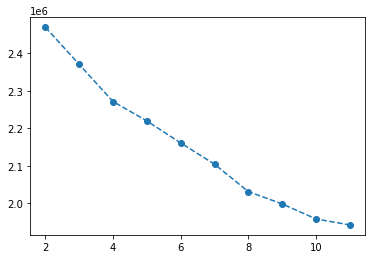

In [26]:
plt.plot(range(2,12),ssd,'o--');

In [27]:
# the elbow at k = 5 for best clustering 

In [28]:
pd.Series(ssd).diff()

0             NaN
1   -99376.065949
2   -98912.206785
3   -51717.997921
4   -58798.246570
5   -56542.147190
6   -73237.723253
7   -32862.593232
8   -40036.450189
9   -15963.158062
dtype: float64

In [ ]:
# from the ssd different values the best k will be 5